# PRÁCTICA 2: Introducción al procesamiento de imágenes en MATLAB (II)

Las imágenes en MatLab se pueden obtener a partir de un fichero, tal y como se hizo en la práctica anterior, a bien por medio de:
- Cámaras definidas en el entorno Windows
- Cámaras IP
- Ficheros de video

Para ello es necesario tener instalada la toolbox de adquisición de imágenes (Image Adquisition Toolbox).

## CÁMARAS EN EL ENTORNO WINDOWS

### Determinar las cámaras conectadas al equipo
```
imaqhwinfo 
```
- InstalledAdaptors: {'matrox' 'winvideo'}
- MATLABVersion: '7.12 (R2016b)'
- ToolboxName: 'Image Acquisition Toolbox'
- ToolboxVersion: '4.1 (R2016b)'

```
webcamlist % cámaras web contectadas

```
Las webcams se encuentran definidas en el adaptador ‘winvideo’
```
<vble_adaptador> = imaqhwinfo(‘<nombre del adaptador>’)
```

Empleando la variable de salida del adaptador podemos saber el número de cámaras conectadas, así como obtener información de cada una de ellas, en lo referente a resolución y formatos de video que admiten.

EJEMPLO
```
adap = imaqhwinfo(‘winvideo’)
adap.DeviceInfo.SupportedFormats
```

### Crear un objeto cámara para realizar la captura de imágenes
```
<vble_camara> = videoinput (‘<nombre del adaptador>’ , <número de cámara>, <’formato’>); % opc1
<vble_camara> = webcam ( <número de cámara>); % opc2
```

In [1]:
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture(0)
print(cap.getBackendName())
print(cap.get(cv.CAP_PROP_POS_MSEC))
print(cap.get(cv.CAP_PROP_POS_FRAMES))
print(cap.get(cv.CAP_PROP_POS_AVI_RATIO))
print(cap.get(cv.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
# ... https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d

MSMF
0.0
0.0
-1.0
640.0
480.0


### Captura de imágenes
```
<vble_imagen> = getsnapshot (<vble_camara>); % opc1
<vble_imagen> = snapshot (<vble_camara>); % opc2
```

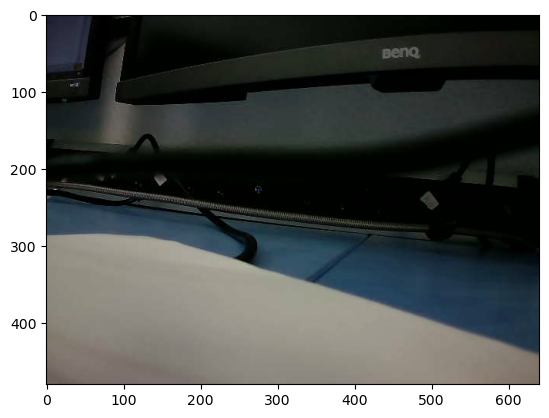

In [2]:
import matplotlib
import matplotlib.pyplot as plt

ret, frame = cap.read()
#cap.release()
cv.destroyAllWindows()

plt.figure()
plt.imshow(frame) #plt.imshow(im1, cmap='gray')
plt.show()

### Previsualización de imágenes
Es posible crear una ventana donde se muestre de forma continua las imágenes que están siendo capturadas por la cámara, sin que éstas se almacenen en ninguna variable de salida.
```
preview(<vble_camara>); % opc1
closePreview(<vble_camara>); % opc2
```
EJEMPLO
```
>> cam = videoinput(‘windvideo’,1)
>> preview(cam);
>> im = getsnapshot(cam);
>> imshow(im)
```

In [ ]:
if not cap.isOpened():
    print("Cannot open camera")
    exit()
i = 0
frames = 20000
while i < frames:
    i += 1
    # Capture frame-by-frame
    ret, frame = cap.read() 
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    #if cv.waitKey(1) == ord('q'):
    #    break
    #if i%1000 == 0:
    #    print(".", sep="")

## CÁMARAS IP

Para acceder a una cámara IP es necesario que su dirección se encuentre en la misma red que el equipo, ya sea directamente o bien a través de un túnel de accedo (VPN). La captura de la imagen se puede realizar leyendo de un fichero virtual (dependerá del tipo de cámara).
```
>> <imagen> = imread (‘<dirección IP del fichero>’) ;
```

EJEMPLO (cámara IP de Axes)
```
>> im = imread('http://172.16.78.113/jpg/image.jpg');
>> imshow(im);
```

This image is:  <class 'PIL.JpegImagePlugin.JpegImageFile'> with dimensions: (864, 576)


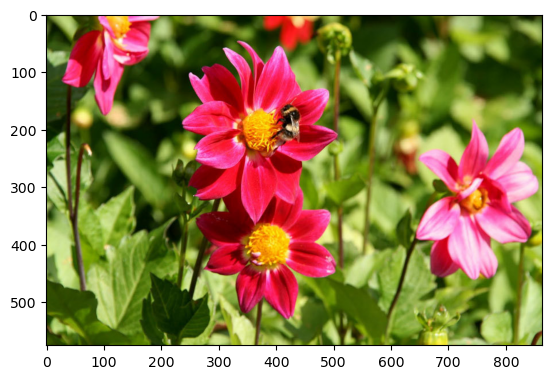

In [19]:
# create a file-like object from the url
import urllib.request as urllib2 # import urllib2
f = urllib2.urlopen("https://res.cloudinary.com/demo/image/upload/v1312461204/sample.jpg")

# Read in the image and print some stats
from PIL import Image
img = Image.open(f)
print('This image is: ',type(img), 'with dimensions:', img.size) #.shape)

# plot the image
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
# read the image file in a numpy array
#a = plt.imread(f)
#a = plt.imread("http://172.16.78.113/jpg/image.jpg")


## CARGAR IMÁGENES DESDE UN FICHERO DE VIDEO (formato estándar: mp4, mwm, avi, etc.)
```
% abre fichero de video
<objvideo> = VideoReader (‘<nombre de fichero>’) ; 

% lee un frame de video y pasa al siguiente
<imagen> = readFrame (<objvideo>) ; 

% TRUE si quedan frames por leer
hasFrame(<objvideo>) 
```

## EJERCICIO 1
Llame a la siguiente función con los ficheros ‘cinta1_p.mp4’ y ‘cinta2_p.mp4’
function VisualizarVideo(fichero)

```
% Muestra sobre una figura el video contenido en fichero especificado con
% entrada. Se muestra frame a frame hasta completar el fichero o se emplee
% la rueda del ratón sobre la figura. Se puede pausar el video haciendo
% clic sobre la figure, reanudándose al pulsar una tecla.
% Define las condiciones de finalización y pausa del programa, se invoca
% a la función 'Terminar' o 'Pausar' por medio del ratón
global fin
fin = 0;
f = figure;
f.ButtonDownFcn = @Pausar;
f.WindowScrollWheelFcn = @Terminar;
%--------------------------------------------------------------
v = VideoReader(fichero); % Abre el fichero y se posiciona sobre el
% primer frame, el objeto video se define
% sobre la variable 'v'
% Se ejecuta hasta que se complete en video o se cancele la ejecución.
while (not(fin) && hasFrame(v))
im = readFrame(v); %Lee el siguiente frame del fichero.
imshow (im);
drawnow;
end
end
function Pausar(~,~) %Se invoca al hacer clic
pause
end
function Terminar(~,~) %Se invoca al mover la rueda del ratón
global fin
fin = 1;
end
```

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np


ret, frame = cap.read() # im1 = mpimg.imread("Connector 01.jpg")
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()
#frame

In [ ]:
plt.figure()
plt.imshow(frame) #plt.imshow(im1, cmap='gray')
plt.show()
frame.shape

## EJERCICIO 2

A partir de la función anterior defina una nueva función que permita visualizar el video sobre una figura junto con la diferencia de dos frames consecutivos en niveles de grises (emplear rgb2gray para realizar la conversión). Esta función permitirá detectar objetos en movimientos dentro del entorno. Compruebe su funcionamiento con el fichero ‘cinta1_p.mp4’. Multiplique la diferencia por 5 para amplificarla.

NOTA: compruebe que ocurre si la diferencia se amplifica multiplicándola por 25.

### Solución 2
```
while (not(fin) && hasFrame(v)
    im1 = readFrame(v);
    im1g = rgb2gray(im1);
    im2 = readFrame(v);
    im2g = rgb2gray(im2);
    imd = 5*(abs(im1g-im2g));
    subplot(2,1,1), imshow(im1);
    subplot(2,1,2), imshow(imd);
    drawnow;
end
```

## EJERCICIO 3
El siguiente código captura el fotograma en t = 6.6, y muestra en una figura la imagen en RGB y la conversión a niveles de grises para HSV y Luma. ¿Cuál cree que sería más adecuado para detectar las piezas independientemente de su color?
```
>> v = VideoReader('Cinta1_p.mp4');
>> v.currentTime = 6.6;
>> im66 = readFrame(v);
>> imHSV = rgb2hsv(im66);
>> V = imHSV(:,:,3);
>> L = rgb2gray(im66);
>> subplot(1,3,1), imshow(im66);
>> subplot(1,3,2), imshow(V);
>> subplot(1,3,3), imshow(L);
```

## DETECTAR PIEZAS

El programa DetectarPiezas_isa (‘<nombre_fichero>’), analiza las imágenes del fichero de video de entrada y muestra la imagen y la diferencia entre una línea de referencia (sin ningún objeto) y la misma línea en sucesivas imágenes.

## EJERCICIO 4

Analizando el resultado determine dos umbrales (umbral1 y umbral2). El primero debe representar cuanto debe variar un nivel de gris para considerar que dicho pixel ha cambiado (no es del fondo) y el segundo determina cuantos pixeles deben cambiar para que se considere que se ha detectado una pieza.

### Solución 4
- umbral1 = 0.5
- niveles entre 0 y 1

## EJERCICIO 5
Compruebe si la detección de las piezas sería factible empleando las componentes H o S de la imagen HSV en lugar de la V. Para ello modifique la captura de las líneas de control.
```
referencia = imHSV(100,80:380,3); %Selecciona componente V
…
nueva = imHSV(100,80:380,3); %Selecciona componente V
```

## EJERCICIO 6
Modifique el programa original de tal forma que la línea de control se vuelva roja cuando se detecta en objeto sobre ella. Para ello debe hacer uso de los umbrales calculados en el ejercicio 3.

### Solución 6
```
while not(fin) && hasFrame(v)
    im = readFrame(v); %Tomar nueva imagen
    imHSV = rgb2hsv(im); %Convertir a HSV
    nueva = imHSV(100,80:380,3); %Seleccionar linea de control
    dif = abs(referencia-nueva); %Calcula las diferencias en la línea de control
    subplot(2,1,1),
    imshow(im); %Muestra la imagen RGB
    hold on
    plot([80 380],[100 100],g');
    hold off
    if (sum(dif>0.5)>)
        hold on
        plot([80 380],[100 100], r');
        hold off
    end

    subplot(2,1,2),
    plot(abs(referencia-nueva)); %Muestra las diferencias
    axis ([1 300, 0 1]); grid on
    drawnow
end
```

## EJERCICIO 7
Modifique el ejercicio anterior para que la cinta se detenga al detectar una pieza (pause). La cinta se deberá poner en marcha al pulsar una tecla y detenerse con cada nueva pieza.

NOTA: será necesario controlar cuando una pieza ya ha sido detectada y esperar a que salga para poder detectar a la siguiente.

### Solución 7
```
dentro = 0;
while not(fin) && hasFrame(v)
    im = readFrame(v); %Tomar nueva imagen
    imHSV = rgb2hsv(im); %Convertir a HSV
    nueva = imHSV(100,80:380,3); %Seleccionar linea de control
    dif = abs(referencia-nueva); %Calcula las direncias en la linea de control
    subplot(2,1,1),
    imshow(im); %Muestra la imagen RGB
    hold on
    plot([80 380],[100 100],'-g');
    hold off

    subplot(2,1,2),
    plot(abs(referencia-nueva)); %Muestra las diferencias
    axis ([1 300, 0 1]); grid on
    drawnow
    if (sum(dif>0.5)>20) && (not(dentro))
        pause;
        dentro = 1;
    end
    if (sum(dif>0.5)<5) % Se deja de detectar
        dentro = 0;
    end
end
```

## EJERCICIO 8

¿Serviría este programa para procesar las piezas de la cinta del video ‘cinta2_p.mp4’

## REPRODUCIR UN VIDEO (formato estándar)
```
<objvideo> = implay(‘<nombre_del_fichero’); % Abre un reproductor de video
```

Es posible capturar el frame que se está visualizando, accediendo directamente a la estructura de datos de la variable **objvideo**.

EJEMPLO
```
>> cam = implay(‘chinchetas.mp4’);
>> im = cam.Visual.Image.CData;
>> imshow(im);
```